### Imports

In [6]:
import spacy
from wordcloud import WordCloud
import gradio as gr
from spacy.lang.en.stop_words import STOP_WORDS
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [7]:
nlp = spacy.load("en_core_web_sm")

In [11]:

text = """We are looking for a dedicated Data Scientist who can transform business challenges into data-driven machine learning solutions. This role requires a professional who can seamlessly integrate with our product teams, offering insights from complex data sources and driving the direction of our products through data-based recommendations. As a Subject Matter Expert in data science, you will play a pivotal role in shaping our analytics approach and ensuring that our decisions are backed by solid data analysis.
Requirements
Problem Solving: Convert complex business problems into data-driven machine learning solutions.
Model Development: Develop, manage, and architect machine learning and advanced analytics models to derive actionable insights.
Data Analysis: Examine data from multiple disparate sources, ensuring integrity, accuracy, and relevance.
Insight Sharing: Present findings and insights to stakeholders, aiding in data-driven decision-making processes.
Subject Matter Expertise: Act as the go-to person in the area of data science, providing guidance and expertise to other teams and stakeholders.
Product Leadership: Influence product teams by presenting data-based recommendations. Communicate the state of business, experiment results, and other relevant insights to ensure alignment with business objectives.
Technical Skills
Programming Languages: Proficiency in Python, R, or other relevant data science languages.
Machine Learning Libraries: Experience with libraries such as TensorFlow, Keras, Scikit-learn, or similar.
Data Manipulation Tools: Proficiency in using tools like Pandas, NumPy, or equivalent."""

In [40]:
def wordcloud(text,n):
    def preprocess_text(text):
        # Step 1: Lowercasing
        text = text.lower()

        # Step 2: Removing punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Step 3: Removing stop words
        doc = nlp(text)
        tokens_without_stopwords = [token.text for token in doc if token.text not in STOP_WORDS]

        # Step 4: Handling numbers and symbols (optional)
        # If you want to keep numbers, you can comment out the following line
        tokens_without_stopwords = [token for token in tokens_without_stopwords if not token.isdigit()]

        # Step 5: Text normalization (optional)
        # You can perform stemming or lemmatization here if needed

        return tokens_without_stopwords

    processed_text = preprocess_text(text)
    
    # Step 1: Compute TF-IDF scores
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_text)

    # Step 2: Select top words based on TF-IDF scores
    # Get feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Create a dictionary to store word -> tfidf_score pairs
    word_scores = {}
    for i, word in enumerate(feature_names):
        word_scores[word] = tfidf_matrix[:, i].mean()  # Average TF-IDF score for the word

    # Sort the dictionary by TF-IDF scores
    top_words_dict = dict(sorted(word_scores.items(), key=lambda item: item[1], reverse=True))

    # Specify the number of top words to display
    top_n = n

    # Get top n words
    top_n_words_dict = dict(list(top_words_dict.items())[:top_n])

    # Step 3: Generate word cloud
    wordcloud = WordCloud(width=800, height=600, background_color="white")
    wordcloud.generate_from_frequencies(top_n_words_dict)

    # Plot the word cloud
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.savefig("plot.png")  # Replace with your desired filename

    return "plot.png"
    

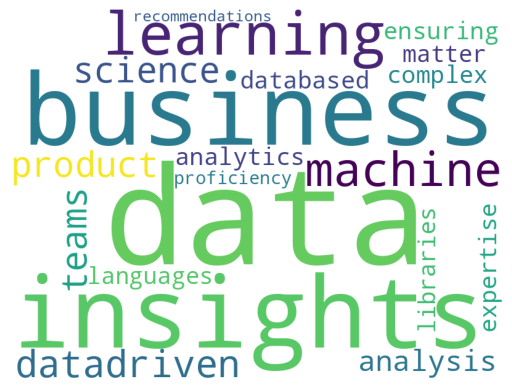

In [35]:
wordcloud(text,20)

In [41]:
interface = gr.Interface(fn=wordcloud,
                         inputs=[gr.Textbox(label="Job Description", lines=5, placeholder="Paste the Job Description"),
        gr.Slider(minimum=10, maximum=100, label="Scale")],
    outputs="image")
# Launch the interface
interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


/tmp/ipykernel_9148/1182934611.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
